## **IMPORTING REQUIRED MODULES**

In [1]:
import pandas as pd
from nltk.stem import WordNetLemmatizer 
from nltk import word_tokenize
import re
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
import sklearn.metrics
import warnings
warnings.filterwarnings("ignore")
import nltk
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import stopwords
stopword = set(stopwords.words('english'))
from sklearn.preprocessing import normalize
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import Dropout

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Using TensorFlow backend.


## **MOUNTING THE GOOGLE DRIVE**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## **READING THE DATA FROM CSV FILES**

In [0]:
train_data = pd.read_csv("/content/drive/My Drive/train_stance.csv",engine='python')
test_data = pd.read_csv("/content/drive/My Drive/test (1).csv",engine='python',names=['Tweet','Target','Stance','Opinion Towards','Sentiment'])

In [4]:
train_data.head()

,Tweet,Target,Stance,Opinion Towards,Sentiment
0,"@tedcruz And, #HandOverTheServer she wiped cle...",Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
1,Hillary is our best choice if we truly want to...,Hillary Clinton,FAVOR,1. The tweet explicitly expresses opinion abo...,pos
2,@TheView I think our country is ready for a fe...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
3,I just gave an unhealthy amount of my hard-ear...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
4,@PortiaABoulger Thank you for adding me to you...,Hillary Clinton,NONE,3. The tweet is not explicitly expressing opi...,pos


In [5]:
test_data.head()

,Tweet,Target,Stance,Opinion Towards,Sentiment
0,He who exalts himself shall be humbled; a...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,pos
1,RT @prayerbullets: I remove Nehushtan -previou...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,other
2,@Brainman365 @heidtjj @BenjaminLives I have so...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,pos
3,#God is utterly powerless without Human interv...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
4,@David_Cameron Miracles of #Multiculturalism...,Atheism,AGAINST,2. The tweet does NOT expresses opinion about ...,neg


## **VISUALIZING THE BAR PLOT FOR COUNT OF INDIVIDUAL CLASSES PRESENT IN TRAINING SET**

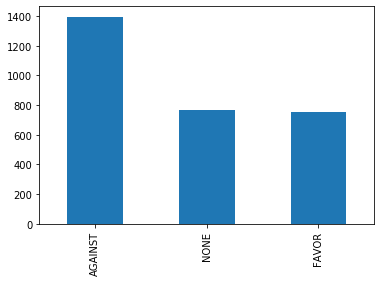

In [6]:
train_data['Stance'].value_counts().plot('bar')

## **VISUALIZING THE BAR PLOT FOR COUNT OF INDIVIDUAL CLASSES PRESENT IN TEST SET**

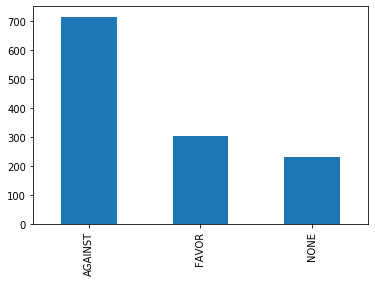

In [7]:
test_data['Stance'].value_counts().plot('bar')

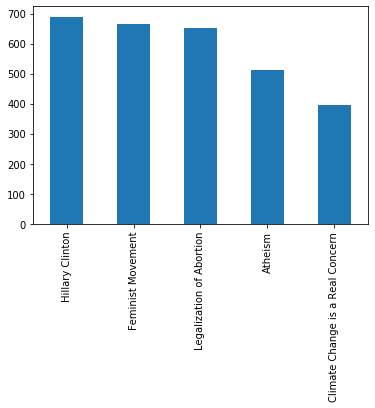

In [8]:
train_data['Target'].value_counts().plot('bar')

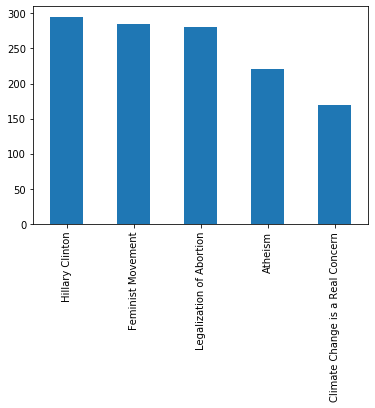

In [9]:
test_data['Target'].value_counts().plot('bar')

## **DIMENSIONS OF TRAINING AND TEST DATA SETS**

In [10]:
print("DIMENSIONS OF TRAINING DATA::",train_data.shape)
print("DIMENSIONS OF TEST DATA::",test_data.shape)

DIMENSIONS OF TRAINING DATA:: (2914, 5)
DIMENSIONS OF TEST DATA:: (1249, 5)


## **PREPARING THE CUSTOMIZED STOP-WORD LIST(NEGATIVE WORDS ARE NOT CONSIDERED TO BE STOP WORDS)**

---



In [11]:
print("TOTAL NUMBER OF STOP WORDS WHEN NEGATIVE WORDS ARE CONSIDERED AS STOP WORDS::",len(stopword))
stopwords=set()
neg_words = {"didn't","shouldn't","hasn't","wasn't","won't","aren't","weren't","doesn't","couldn't","don't","hadn't","shan't","wouldn't"}
for i in stopword:
    if i not in neg_words:
        stopwords.add(i)
print("TOTAL NUMBER OF STOP WORDS WHEN NEGATIVE WORDS ARE NOT CONSIDERED AS STOP WORDS::",(len(stopwords)))
print(stopwords)

TOTAL NUMBER OF STOP WORDS WHEN NEGATIVE WORDS ARE CONSIDERED AS STOP WORDS:: 179
TOTAL NUMBER OF STOP WORDS WHEN NEGATIVE WORDS ARE NOT CONSIDERED AS STOP WORDS:: 166
{"you'll", 'weren', 'haven', 'during', 'there', 'while', 'do', 'will', 'theirs', 'about', 'yourself', 'but', 'over', "you've", "should've", 'what', 'does', 'won', "mightn't", 'those', 'from', 'i', 'some', 'she', "mustn't", 'yourselves', 'other', 'doing', 'couldn', 'not', 'down', 'herself', 'of', 'is', 'm', 'how', 'until', 'ain', 'because', "you're", 'was', 'off', "you'd", 'all', 'own', "isn't", 'more', 'are', 've', 'were', 'before', 'no', 'very', 'or', 'our', 'itself', 't', 'wasn', 'when', 'they', 'that', 'out', 'them', 'we', 'o', 'who', 's', 'having', 'aren', 'myself', 'any', 'nor', 'these', 'as', 'to', 'further', 'by', "it's", 'll', 'with', 'above', 'its', 'here', 'ma', "she's", 'then', 'am', 'wouldn', 'why', 'it', 'below', 'being', 'few', 'can', 'should', 'him', 'needn', 'into', 'don', 'did', 'just', 'in', 'had', 'a',

## **DATA-PREPROCESSING FUNCTION**

In [0]:
def preprocess(text):
  stopwords = {'such', 'each', 'doesn', 'herself', 'been', 'was', 've', 'at', 'before', 'they', 'he', 'all','t', 'wouldn', 'ain', 'the', 'doing', 'so', 'couldn', 
                'ours', 'wasn', 'having', 'your', 'up','do', 're', 'be', 'weren', 'hadn', 'should', 'nor', 'and', 'hers', 'won', 'why', 'i', 'mustn', 
                'don', 'those', 'other', 'her', 'very', 'an', 'just', 'any', 'through', 'himself', 'where','while', 'only', 'ma', 'between', 'from', "you've",
                'in', 'by', 'were', 'to', 'itself', 'how', 'no', 'own', 'too', 'when', 'hasn', 'aren', 'needn','a', 'which', 'shan', 'him', 'if', 'had', "should've", 
                'there', 'haven', 'have', 'd', 'most', 'mightn', 'yourself', 'this', 'about', 'them', 'who','being', 'whom', 'we', 'our', 'my', 'll', 'not', 'above', 
                's', 'until', 'o', "haven't", 'with', "you're", "mustn't", 'themselves', "it's", 'shouldn', "you'd", 'it', 'its', 'both', 'than', 'm', 'that', 'will', 
                'as', 'isn', 'myself', 'yours', 'out', 'she', 'ourselves', 'theirs', 'are', 'few', 'has', 'but', 'into', 'here', 'after', 'you', 'off', "she's", 'then', 
                "you'll", 'y', 'me', 'during', 'again', 'against', 'what', 'is', 'because', 'down','some', 'of', 'or', 'once', 'more', "that'll", 'under', 'for', 'can',
                'am', 'further', 'these', "needn't", 'on', 'did', 'now','below', "isn't", 'his', 'their', 'didn', 'yourselves', 'does', 'over', 'same', "mightn't",}
  lemma = WordNetLemmatizer()
  pattern = '[#?“"",.!0-9$\[\]/\}#=<>"\'*:,|_~;()^-]'
  words = text.split()
  sentence= ""
  for i in words:
    #https://stackoverflow.com/questions/19859282/check-if-a-string-contains-a-number
    if((any(l.isdigit() for l in i)) or (i in stopwords) or len(i)<3 or i[0]=="@"):
      continue
    w=''
    for j in i:
      if(re.match(pattern,j)):
        continue
      else:
        w=w+j
    i=w
    i=i.lower()
    i=lemma.lemmatize(i)
    sentence=sentence+i+" "
  return sentence.strip()

## **APPLYING DATA-PREPROCESSING FUNCTION TO EVERY TWEET OF TRAIN AND TEST DATA**

In [0]:
train_data['Tweet'] = train_data.Tweet.apply(preprocess)
test_data['Tweet'] = test_data.Tweet.apply(preprocess)

## **TRAIN DATA AFTER PREPROCESSING**

In [14]:
train_data.head()

,Tweet,Target,Stance,Opinion Towards,Sentiment
0,and handovertheserver wiped clean deleted emai...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
1,hillary best choice truly want continue progre...,Hillary Clinton,FAVOR,1. The tweet explicitly expresses opinion abo...,pos
2,think country ready female pres cant ever hillary,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
3,gave unhealthy amount hardearned money away bi...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
4,thank adding list,Hillary Clinton,NONE,3. The tweet is not explicitly expressing opi...,pos


## **TEST DATA AFTER PREPROCESSING**

In [15]:
test_data.head()

,Tweet,Target,Stance,Opinion Towards,Sentiment
0,exalts shall humbled humbles shall exaltedmatt...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,pos
1,remove nehushtan previous move god become idol...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,other
2,sought truth soul found strong enough stand me...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,pos
3,god utterly powerless without human interventi...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
4,miracle multiculturalism miracle shady taqiya ...,Atheism,AGAINST,2. The tweet does NOT expresses opinion about ...,neg


## **CONVERTING THE TWEETS OF TRAINING DATA INTO BAG OF WORDS REPRESENTATION AND PERFORMING ONE HOT ENCODING OF STANCE FEATURES**

In [0]:
bow = CountVectorizer(min_df=50,max_features=1000) 
type(bow.fit_transform(train_data['Tweet']))

scipy.sparse.csr.csr_matrix

In [0]:
bow = CountVectorizer(max_features=2000) 
x_train_bow = bow.fit_transform(train_data['Tweet'])
x_train_oh = np.array(pd.get_dummies(train_data['Target']))

x_train_bow_norm = normalize(x_train_bow,axis=0)

x_test_bow = bow.transform(test_data['Tweet'])
x_test_oh = np.array(pd.get_dummies(test_data['Target']))

x_test_bow_norm = normalize(x_test_bow,axis=0)

print(x_train_bow_norm.shape,x_train_oh.shape,x_test_bow_norm.shape,x_test_oh.shape)

(2914, 2000) (2914, 5) (1249, 2000) (1249, 5)


## **CONCATENATING TWO ARRAYS OF BOWS FEATURES AND ONE-HOT ENCODING FEATURES**

In [0]:
x_train = np.hstack((x_train_bow_norm.toarray(),x_train_oh)) 
x_test = np.hstack((x_test_bow_norm.toarray(),x_test_oh)) 

print(x_train.shape,x_test.shape)

(2914, 2005) (1249, 2005)


## **MODIFYING THE CLASS LABELS OF INTO NUMERICALS**

In [0]:
def modify_labels(text):
  if(text == "AGAINST" ):
    return 0
  if(text == "NONE" ):
    return 1
  if(text == "FAVOR" ):
    return 2

In [20]:
y_train = train_data.Stance.apply(modify_labels)
y_test = test_data.Stance.apply(modify_labels)
print(y_train.shape,y_test.shape)

(2914,) (1249,)


## **IMPLEMENTATION OF NAIVE BAYES**

In [0]:
#https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
hypm_alpha = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]
#trying out with various smoothing factors..
f1scores=[]
for i in hypm_alpha:
    nb = MultinomialNB(alpha=i)
    nb.fit(x_train,y_train)
    prediction = nb.predict(x_test)
    score = metrics.f1_score(y_test,prediction,average='macro')
    f1scores.append(score)

In [0]:
print(f1scores)

[0.4790146412631864, 0.4801239774373902, 0.4863242647926332, 0.4891584804543479, 0.5026999811982312, 0.4779400279233254, 0.43702283766360406, 0.4348285602674409, 0.2427019687712152]


## **SMOOTHING FACTORS v/s F1 SCORES**

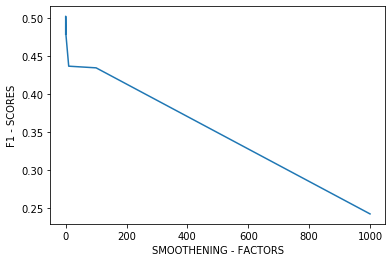

[0.4790146412631864, 0.4801239774373902, 0.4863242647926332, 0.4891584804543479, 0.5026999811982312, 0.4779400279233254, 0.43702283766360406, 0.4348285602674409, 0.2427019687712152]


In [0]:
from  matplotlib import pyplot
pyplot.plot(hypm_alpha,f1scores)
pyplot.xlabel("SMOOTHENING - FACTORS")
pyplot.ylabel("F1 - SCORES")
pyplot.show()
print(f1scores)

# **THE OPTIMAL SMOOTHENING FACTOR IS 0.1**

# **THE F-1 SCORE ON TEST DATA USING NAIVE BAYES WITH OPTIMAL SMOOTHENING PARAMETER OF 0.1 IS 50.2%**

In [0]:
train_data['ModTweet'] = "a"
for i in range(0,len(train_data)):
  train_data['ModTweet'][i] = train_data.iloc[i,0]+" <tar>"+train_data.iloc[i,1].replace(" ","")

In [0]:
test_data['ModTweet'] = "a"
for i in range(0,len(test_data)):
  test_data['ModTweet'][i] = test_data.iloc[i,0]+" <tar>"+test_data.iloc[i,1].replace(" ","")

In [0]:
x_train_lstm = train_data['ModTweet'].copy()
y_train_lstm = y_train.copy()
x_test_lstm  = test_data['ModTweet'].copy()
y_test_lstm  = y_test.copy()

In [0]:
def vocab_gen(data):
  vocab={}
  for i in data:
    for j in i.split():
      if j not in vocab:
        vocab[j]=1
      else:
        vocab[j]+=1
  return vocab

In [0]:
vocab_train = vocab_gen(x_train_lstm)
vocab_test = vocab_gen(x_test_lstm)
vocab_train_mod = sorted(vocab_train, key=vocab_train.get, reverse=True)

## **FUNCTION DEFINITION FOR CONVERTING SENTENCE TO NUMERICS** ##

In [0]:
def sent_to_vector(tweet,data_vocab,type_data):
  sent = []
  for i in tweet.split():
    if(type_data=="train"):
        sent.append((data_vocab.index(i))+1)
    if(type_data=="test"):
      if(i in data_vocab):
          sent.append((data_vocab.index(i))+1)
      else:
        continue
  return sent

## **FUNCTION CALLING FOR "sent_to_vector()" on TRAIN AND TEST DATA SETS** ##

In [28]:
x_train_lis=[]
for i in tqdm(range(len(x_train_lstm)),position=0):
  x_train_lis.append(sent_to_vector(x_train_lstm.iloc[i],vocab_train_mod,"train"))

x_train_arr = np.array(x_train_lis)

x_test_lis=[]
for i in tqdm(range(len(x_test_lstm)),position=0):
  x_test_lis.append(sent_to_vector(x_test_lstm.iloc[i],vocab_train_mod,"test"))

x_test_arr = np.array(x_test_lis)

100%|██████████| 1249/1249 [00:00<00:00, 2981.78it/s]


## **PERFORMING PADDING MAKING VECTOR LENGTH EQUAL**

In [0]:
x_train_arr = sequence.pad_sequences(x_train_arr, maxlen=30)
x_test_arr = sequence.pad_sequences(x_test_arr, maxlen=30)

In [34]:
pip install keras_metrics

## **LSTM ARCHITECTURE** ##

In [42]:
#ref::https://keras.io/examples/imdb_lstm/
import keras_metrics
import keras
model = Sequential()
model.add(Embedding(10174,64,input_length=30)) #taking whole length of vocab
model.add(LSTM(12))
model.add(Dropout(0.8))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[keras_metrics.precision(),keras_metrics.recall()])
values=model.fit(x_train_arr,keras.utils.to_categorical(y_train_lstm, num_classes=3),nb_epoch=23,batch_size=500)

Epoch 1/23
2914/2914 [==============================] - 1s 336us/step - loss: 1.0983 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2/23
2914/2914 [==============================] - 0s 129us/step - loss: 1.0851 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/23
2914/2914 [==============================] - 0s 133us/step - loss: 1.0741 - precision: 1.0000 - recall: 0.0022
Epoch 4/23
2914/2914 [==============================] - 0s 133us/step - loss: 1.0608 - precision: 0.8182 - recall: 0.0194
Epoch 5/23
2914/2914 [==============================] - 0s 128us/step - loss: 1.0504 - precision: 0.7047 - recall: 0.0975
Epoch 6/23
2914/2914 [==============================] - 0s 130us/step - loss: 1.0392 - precision: 0.6463 - recall: 0.1821
Epoch 7/23
2914/2914 [==============================] - 0s 131us/step - loss: 1.0241 - precision: 0.6634 - recall: 0.2896
Epoch 8/23
2914/2914 [==============================] - 0s 134us/step - loss: 1.0118 - precision: 0.6799 - recall: 0.3685
Epoch 9/

In [0]:
scores = model.evaluate(x_test_arr,keras.utils.to_categorical(y_test_lstm,num_classes=3), verbose=0)
print("f1-Score::",round(100*2*scores[1]*scores[2]/(scores[1]+scores[2]),2))

f1-Score:: 74.66


In [0]:
## FOR PREDICTION PURPOSES.....yhat = model.predict(x_test_arr, verbose=0)

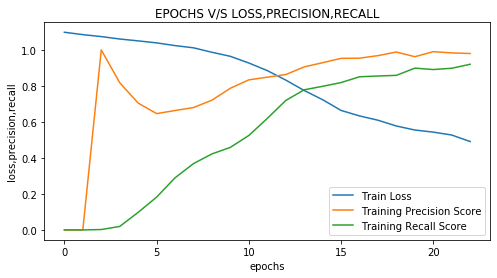

In [47]:
plt.figure(figsize=(8,4))
plt.plot(values.history['loss'], label='Train Loss')
plt.plot(values.history['precision'],label="Training Precision Score")
plt.plot(values.history['recall'],label="Training Recall Score")
plt.title('EPOCHS V/S LOSS,PRECISION,RECALL')
plt.ylabel('loss,precision,recall')
plt.xlabel('epochs')
plt.legend()
plt.show()

# **THE F-1 SCORE ON TEST DATA USING LSTM'S IS 74.66**

### REFERENCES:: 
1. https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/
2. My Own SemEval Sentimix Task
3. https://keras.io/examples/imdb_lstm/
4. https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
5.     #https://stackoverflow.com/questions/19859282/check-if-a-string-contains-a-number

